In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [2]:
# import the data
df = pd.read_csv('../input/suv-data/suv_data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

We can see that there are no null values in our dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


we can see that the gender column is categorical in nature,we will convert the same into numerical column, also we do not want the User ID column as we can observe that it is not of much importance. So we will drop the column.

In [6]:
df.drop(['User ID'], axis=1, inplace = True)

In [7]:
le = LabelEncoder()

In [8]:
df['Gender'] = le.fit_transform(df['Gender'])

We have values of varying length in our column, so we will scale the values so that our model performs better.

In [9]:
sc = StandardScaler()

In [10]:
df.iloc[:,:3]  = sc.fit_transform(df.iloc[:,:3])
df.iloc[:,:3]

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751
...,...,...,...
395,-0.980196,0.797057,-0.844019
396,1.020204,1.274623,-1.372587
397,-0.980196,1.179110,-1.460681
398,1.020204,-0.158074,-1.078938


Now we will divide the features into dependent and independent features.

In [11]:
X = df.drop(['Purchased'], axis=1)
X

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751
...,...,...,...
395,-0.980196,0.797057,-0.844019
396,1.020204,1.274623,-1.372587
397,-0.980196,1.179110,-1.460681
398,1.020204,-0.158074,-1.078938


In [12]:
Y = df['Purchased']
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

Now we will divide our data into training and testing data.

In [13]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state=99)

In [14]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((280, 3), (120, 3), (280,), (120,))

Now we will train our model.

In [15]:
dt = DecisionTreeClassifier()

In [16]:
dt.fit(train_x, train_y)

DecisionTreeClassifier()

We will check the importance of the features.

In [17]:
features = pd.DataFrame({'Features' : train_x.columns, 'Importance' : dt.feature_importances_})
features.sort_values('Importance', ascending=False)

,Features,Importance
1,Age,0.502650
2,EstimatedSalary,0.470845
0,Gender,0.026505


We can see that the Gender features is not of much importance, we can choose to drop it or keep it, i will keep it as of now.

In [18]:
y_pred  = dt.predict(test_x)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [19]:
dt.score(test_x, test_y)

0.8833333333333333

In [20]:
results = pd.DataFrame({'Actual' : test_y, 'Predicted' : y_pred})
results

,Actual,Predicted
61,0,0
348,0,0
163,0,0
7,1,1
275,1,1
...,...,...
259,1,0
241,0,0
106,0,0
200,0,0


In [21]:
accuracy_score(test_y, y_pred)

0.8833333333333333

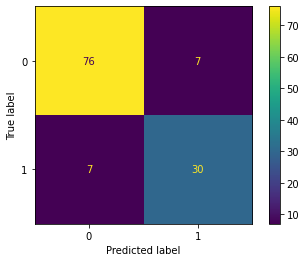

In [22]:
plot_confusion_matrix(dt, test_x, test_y)

We will also visualize how our decision tree works

[Text(816.2538461538461, 1037.7818181818182, 'Age <= 0.654\ngini = 0.471\nsamples = 280\nvalue = [174, 106]\nclass = 0'),
 Text(530.8153846153846, 938.9454545454546, 'EstimatedSalary <= 0.61\ngini = 0.275\nsamples = 194\nvalue = [162, 32]\nclass = 0'),
 Text(260.4, 840.1090909090909, 'Age <= -0.11\ngini = 0.071\nsamples = 162\nvalue = [156, 6]\nclass = 0'),
 Text(220.33846153846153, 741.2727272727273, 'gini = 0.0\nsamples = 112\nvalue = [112, 0]\nclass = 0'),
 Text(300.46153846153845, 741.2727272727273, 'EstimatedSalary <= 0.404\ngini = 0.211\nsamples = 50\nvalue = [44, 6]\nclass = 0'),
 Text(260.4, 642.4363636363637, 'EstimatedSalary <= 0.14\ngini = 0.153\nsamples = 48\nvalue = [44, 4]\nclass = 0'),
 Text(120.18461538461538, 543.6, 'Age <= -0.015\ngini = 0.056\nsamples = 35\nvalue = [34, 1]\nclass = 0'),
 Text(80.12307692307692, 444.76363636363635, 'EstimatedSalary <= -0.183\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(40.06153846153846, 345.9272727272727, 'gini = 0.

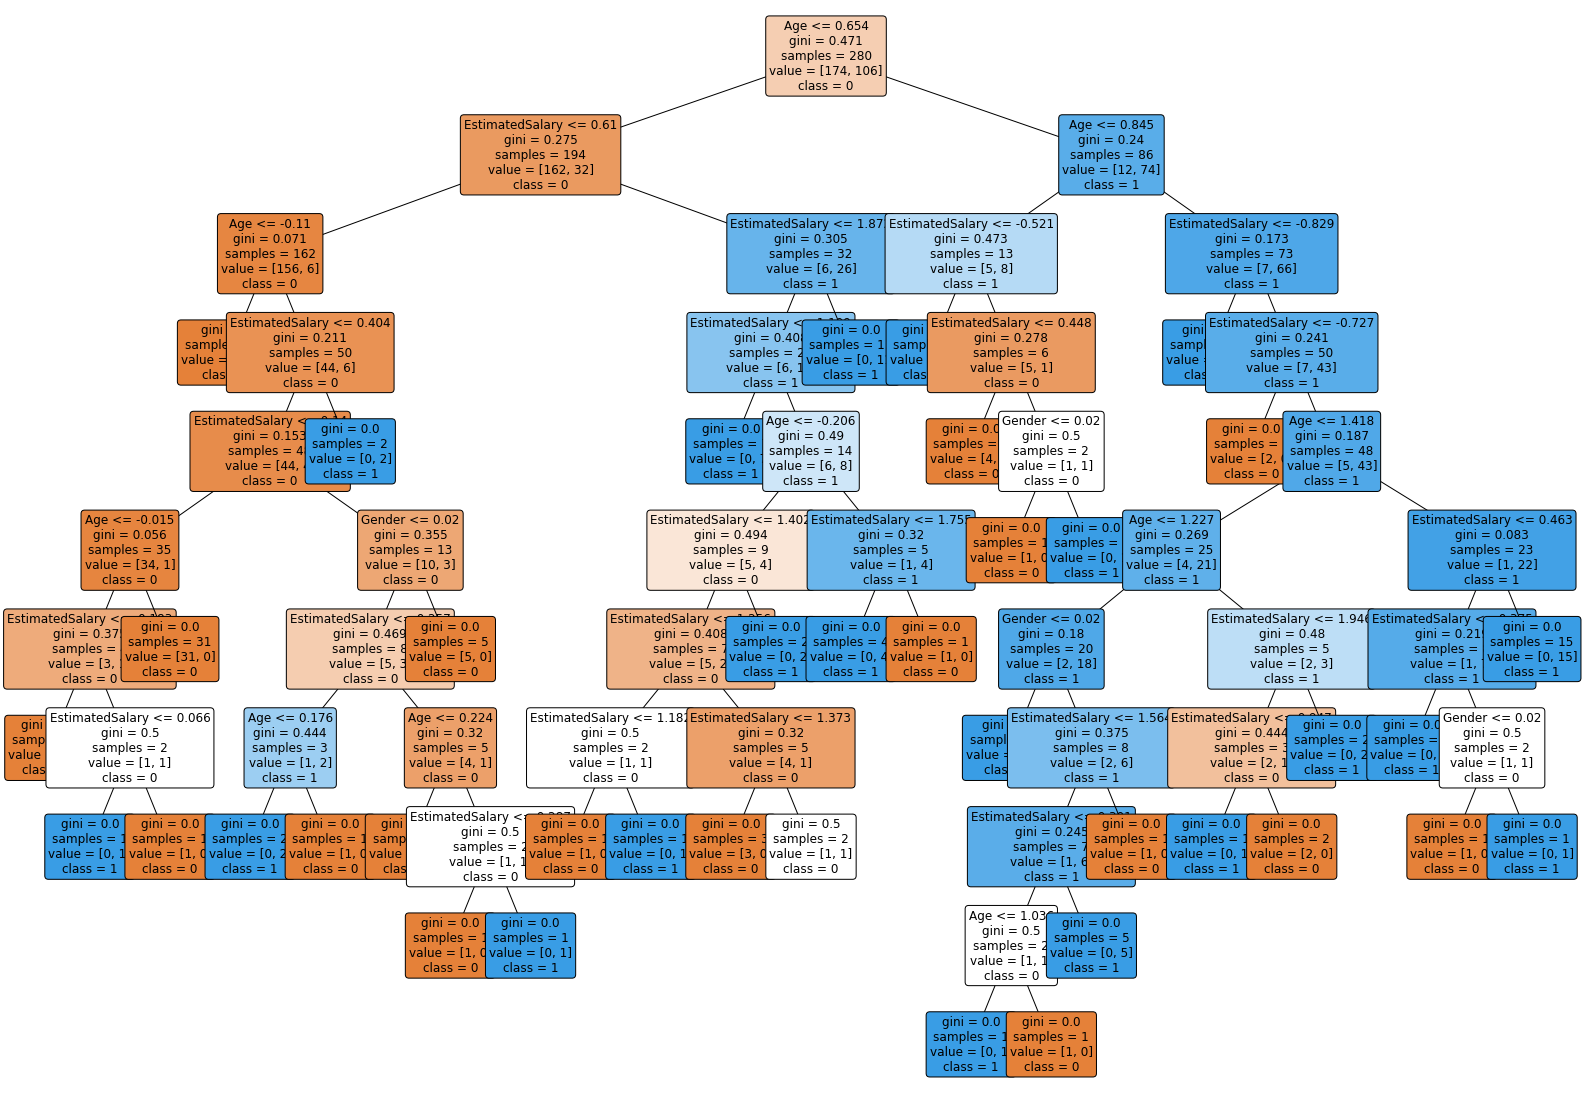

In [23]:
plt.figure(figsize=(28,20))

tree.plot_tree(dt, feature_names=train_x.columns, class_names=['0','1'], filled=True, rounded=True, fontsize=12)